# Data Science

***


WS 2023

Dr. Cristian Grozea


***

## Machine Learning

### Deep Learning

- Neural Networks
- Gradient Descent
- Backpropagation


# Course Plan

1. #Introduction to Machine Learning (ML)
    * #Examples of Applications
    * #Types of machine learning
    * #Issues around ML
    * #Testing and Validation
1. Classification and Regression
    * #Datasets
    * #Binary classification
    * #Accuracy measures
    * #Multiclass classification
1. Various model types and Training models
    * #Linear regression
    * #Polynomial regression
    * Regularisation (self-study - p.32-, p.155-, p.202-)
    * Logistic Regression (to be covered briefly)
    * Training Models
1. #Local learning/k-NN
1. Support Vector Machines (self-study - Chapter 5 p.175-)
1. Decision Trees
1. Ensemble Learning, Random Forest, XGBoost
1. Dimensionality Reduction
1. Unsupervised Learning
1. #Statistics: Definitions and Tools
1. **[today] Neural Networks/Deep Learning**
1. Reinforcement Learning, Deep Reinforcement Learning
    


# The Perceptron
## Simplistic model of a neuron

$$y=h(w^Tx+b)$$


|name|what it is            |
-------|---------------------
|$x$   | input, $x\in \mathbf{R}^n$ |
|$w$ | weights, $w\in \mathbf{R}^n$ |
|$b$ | bias $b\in \mathbf{R}$|
|$h$   | non-linear activation function, $h:\mathbf{R}\to \mathbf{R}$|

$activation=w_1*x_1+w_2*x_2+w_3*x_3+b$

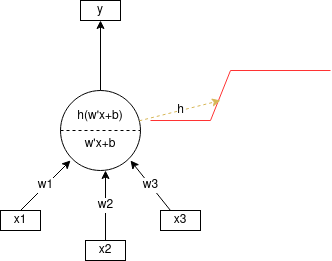

## Activation functions
- Heaviside
    
    $    h(x)=    \begin{cases}1 & x \ge0 \\ 0& else\end{cases}$
    
- ReLU (Rectified Linear Unit)

    $h(x)=max(x,0)$
    
- Sigmoid
    
    $h(x)=\frac{1}{1+e^{-x}}$
    
    Note: fitting a perceptron with sigmoid activation function, used for classification is named **logistic regression**
    

- Hyperbolic tangent (Tanh)
    
    $h(x)=\frac{e^{2x}+1}{e^{2x}-1}$

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-20,20,100)

In [ ]:
plt.plot(x,x>=0)
plt.title("Heaviside (step function)");

In [ ]:
plt.plot(x,np.maximum(x,0))
plt.title("ReLU");

In [ ]:
plt.plot(x,1/(1+np.exp(-x)))
plt.title("Sigmoid (=Logistic)");
plt.grid(1)

In [ ]:
plt.plot(x,np.tanh(x))
plt.title("hyperbolic tangent ");
plt.grid(1)

In [ ]:
x=np.linspace(-2,2,100)
plt.plot(x,np.maximum(np.sign(x),0))
plt.plot(x,np.maximum(x,0))
plt.plot(x,1/(1+np.exp(-x)))
plt.plot(x,np.tanh(x))
plt.grid(1)
plt.legend(['Heaviside','ReLU','Sigmoid','tanh'])


## Single perceptron

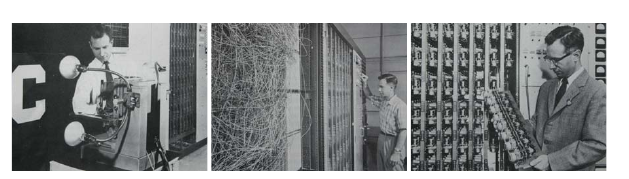 
"Mark-1" built by Rosenblatt - 1960s, reproduced from the book of Bishop "Pattern recognition and machine learning"

### Capabilities (live discussion):

- Regression?
- Classification?
- What type of separation can it implement?


## Training the Perceptron

- math trick: by extending all inputs with an extra feature, constant 1, one can assume the activation is just 
$$w^Tx$$

### The perceptron learning rule (Rosenblatt) - online learning

$$w_{t+1}=w_{t}+\eta(y_t-\hat{y_t})x_t$$ 
where

|name|what it is            |
-------|---------------------
|$w_{t}$   | the weights at the step $t$|
|$w_{t+1}$ | the weights at the step $t+1$|
|$x_t$|the sample considered at step $t$|
|$y_t$|the target for the sample considered at step $t$|
|$\hat{y_t}$|the prediction of the model with the weights $w_t$|
|$\eta$|the learning rate, $\eta \in \mathbf{R}_+$|


### Perceptron learning

In [ ]:
import seaborn as sns;np.random.seed(1322)
data=np.random.rand(20,3);data[:,2]=1;t=(1*data[:,1]+1*data[:,0]-1.3*data[:,2]>0).astype("float")
w=np.array([0,1,-0.5])
def p(w,selected,vcos):
    plt.subplot(121);sns.scatterplot(x=data[:,0],y=data[:,1],hue=t)
    plt.axis([-1,2,-1,2])
    if w[1]!=0:plt.plot([-1,2],[(-w[2]-(-1)*w[0])/w[1],(-w[2]-(2)*w[0])/w[1]])
    if selected!=None: plt.plot(data[selected,0],data[selected,1],'y+',ms=40)
    plt.subplot(122);plt.plot(range(len(vcos)),vcos,'yo-');plt.grid(1)
    plt.ylabel("cos")
vcos=[]
data,t

In [ ]:
wt=np.array([1,1,-1.3]);matplotlib.rcParams['figure.figsize'] = [8,3]
eta=0.1
attempts=0;found=False #search for a misclassified example 
while not found and attempts<1000:
    selected=np.random.randint(0,len(t));x=data[selected,:]
    before=x@w
    prediction=(x@w>0).astype("float"); err=(t[selected]-prediction)
    found=(err!=0);attempts+=1
p(w,selected if found else None,vcos);cosangle=np.dot(w,wt)/(np.linalg.norm(w)*np.linalg.norm(wt));vcos.append(cosangle)
if found:
    w=w+eta*err*x;after=x@w #perceptron learning rule
    print(selected,prediction,t[selected],before,after,w,cosangle)
else: print(w,cosangle)

### The perceptron on a non-linear problem
Minsky & Papert 1969 "Perceptrons" => the "AI Winter"

In [ ]:
import seaborn as sns;np.random.seed(1322)
data=np.random.rand(50,3);data[:,2]=1;t=np.logical_xor(data[:,0]>0.5,data[:,1]>0.5).astype("float")
w=np.array([0,1,-0.5])
def p(w,selected,vcos):
    plt.subplot(121);sns.scatterplot(x=data[:,0],y=data[:,1],hue=t)
    plt.axis([-1,2,-1,2])
    if w[1]!=0:plt.plot([-1,2],[(-w[2]-(-1)*w[0])/w[1],(-w[2]-(2)*w[0])/w[1]])
    if selected!=None: plt.plot(data[selected,0],data[selected,1],'y+',ms=40)
    plt.subplot(122);plt.plot(range(len(vcos)),vcos,'yo-');plt.grid(1)
vcos=[]
data,t

In [ ]:
wt=np.array([1,1,-1.3]);matplotlib.rcParams['figure.figsize'] = [8,3]
eta=0.1
attempts=0;found=False #search for a misclassified example 
while not found and attempts<1000:
    selected=np.random.randint(0,len(t));x=data[selected,:]
    before=x@w
    prediction=(x@w>0).astype("float"); err=(t[selected]-prediction)
    found=(err!=0);attempts+=1
p(w,selected if found else None,vcos);cosangle=np.dot(w,wt)/(np.linalg.norm(w)*np.linalg.norm(wt));vcos.append(cosangle)
if found:
    w=w+eta*err*x;after=x@w
    print(selected,prediction,t[selected],before,after,w,cosangle)
else: print(w,cosangle)

# Multi-Layer-Perceptron (MLP-) Networks
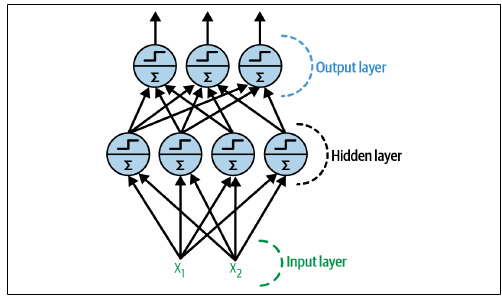
(image from the Hands On ML book by Aurelien Geron)

# Deep Networks/ Deep Learning
A very wide field, see 
https://mlcompendium.gitbook.io


### Neural Network Zoo (Connectionism )
https://www.asimovinstitute.org/neural-network-zoo/
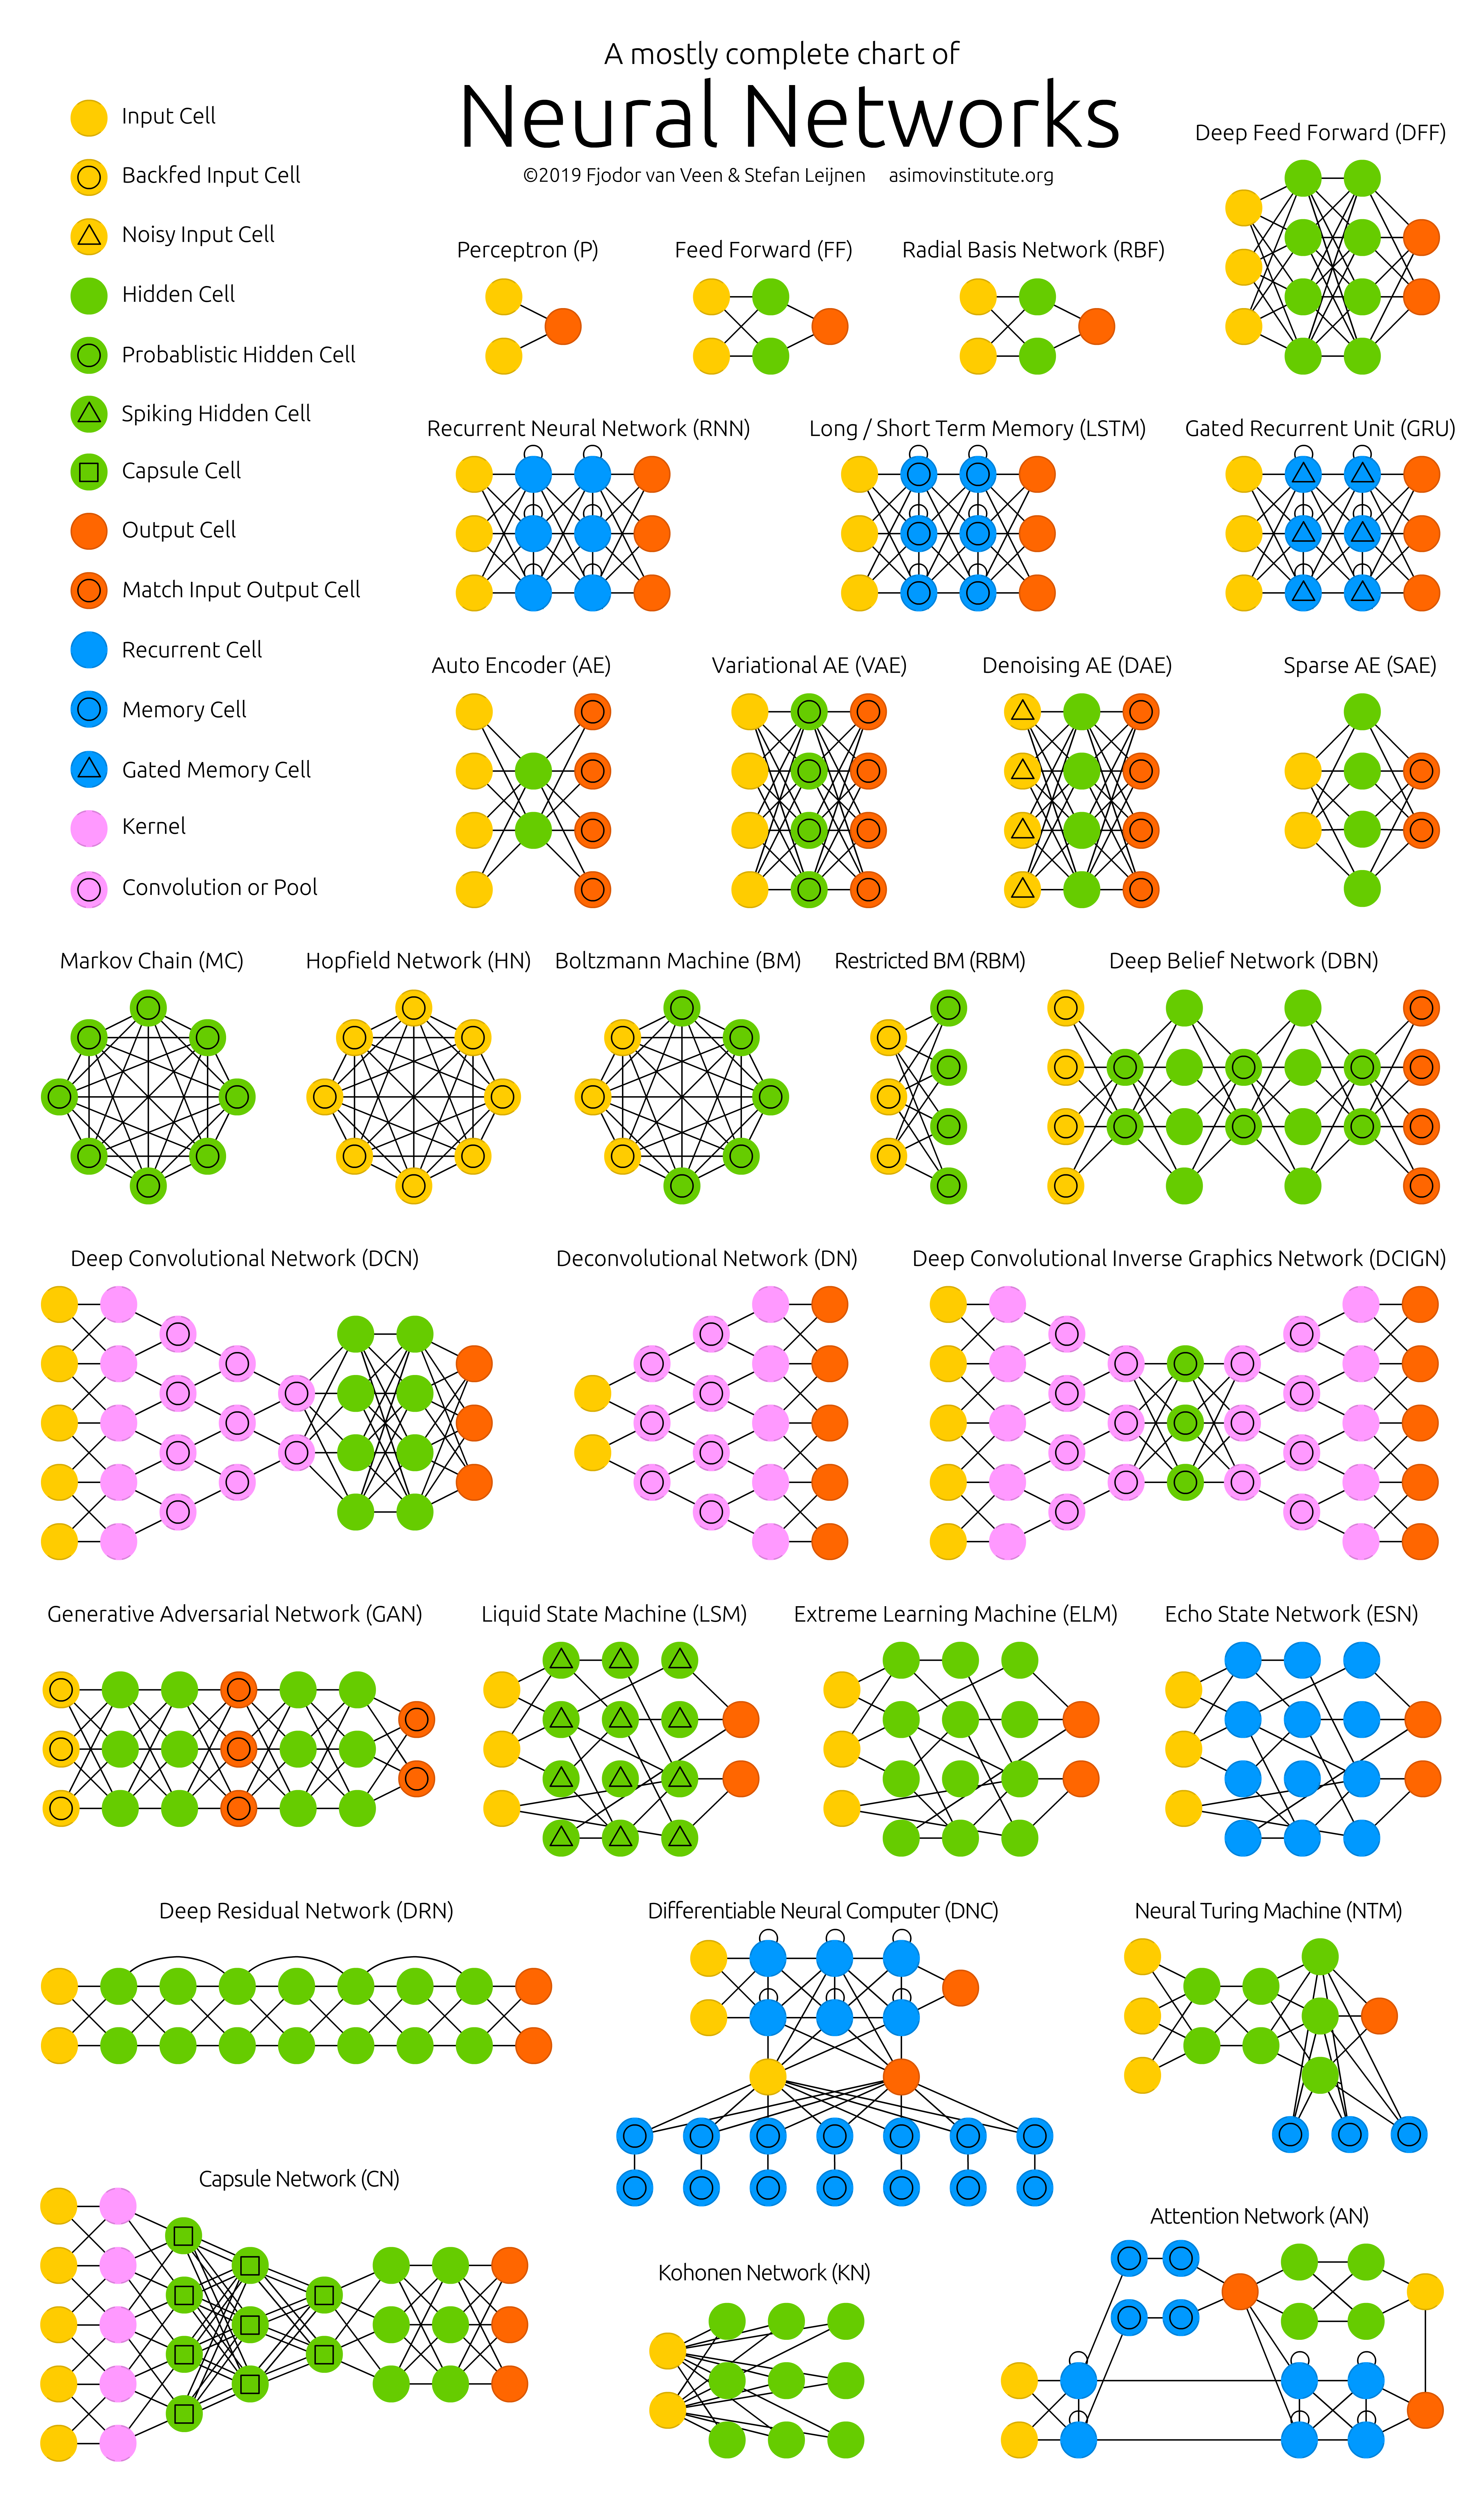

# Capabilities of the MLP networks

## For regression
Universal function approximation

(see https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Arnold_representation_theorem 

and 
https://en.wikipedia.org/wiki/Universal_approximation_theorem
)

## For classification/partition of the space}

### Logic gates implemented with neurons: not, and, or, xor

NOT

|Input x|Output y=not(x)            |
-------|---------------------
|0   | 1 |
|1   | 0 |

1 neuron:
$$not(x)=h(1-x)$$
where $h$ is the activation function

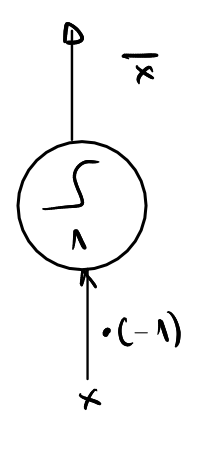

AND

|Input x1 | x2 | Output y=and(x1,x2) |
|---|---|---|
|0   | 0 | 0                                     |
|0   | 1 | 0 |
|1   | 0 | 0 |
|1   | 1 | 1 |


1 neuron:
$$and(x,y)=h(x+y-1.5)$$

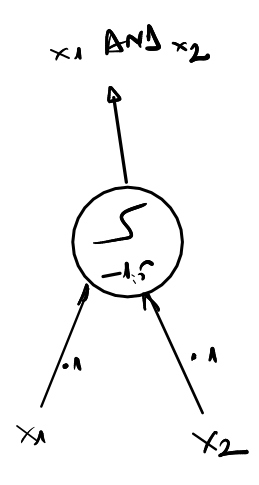

OR 

|Input x1 | x2 | Output y=or(x1,x2) |
|---|---|---|
|0   | 0 | 0                                     |
|0   | 1 | 1 |
|1   | 0 | 1 |
|1   | 1 | 1 |


1 neuron:

$$or(x)=h(x+y-0.5)$$

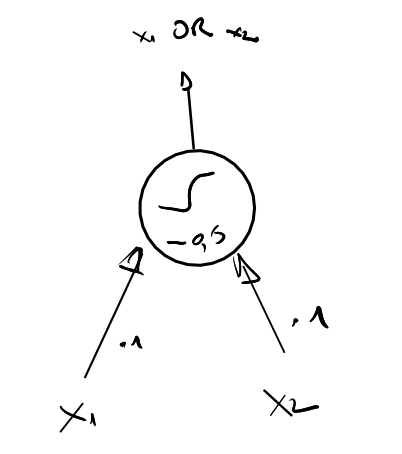

OR

Alternatively, as a network

$$or(x,y)=not(and(not(x),not(y)))$$



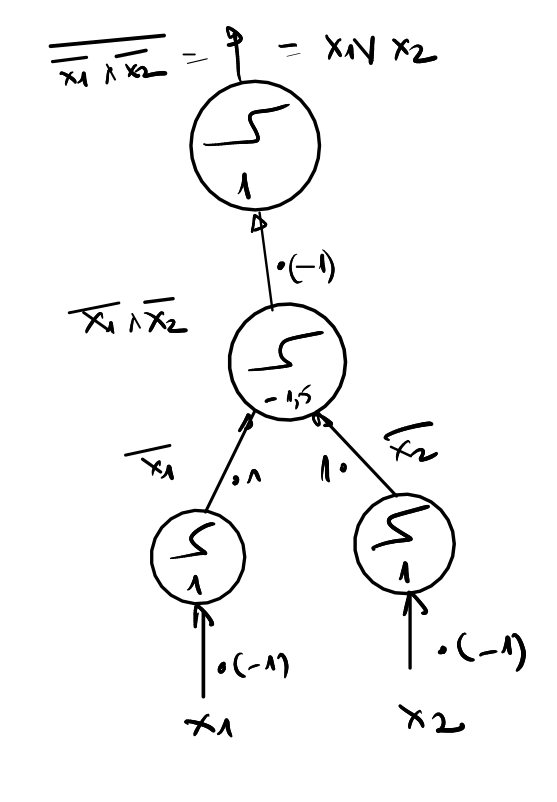

XOR

|Input x1 | x2 | Output y=xor(x1,x2) |
|---|---|---|
|0   | 0 | 0                                     |
|0   | 1 | 1 |
|1   | 0 | 1 |
|1   | 1 | 0 |


$$xor(x,y)=or(and(x,not(y)),and(not(x),y))$$
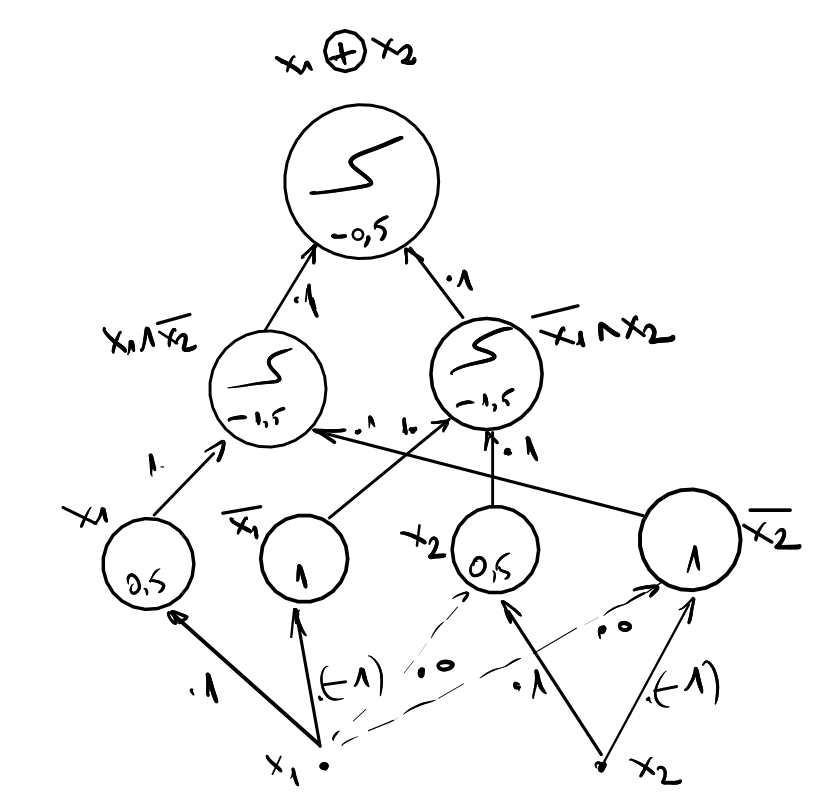

## Expressive Power of MLP FF NN for Classification

- combining with arbitrary logic...
- arbitrary linear partitions of the space

=> can approximate any partition - here a disc approximated with an intersection of semiplanes

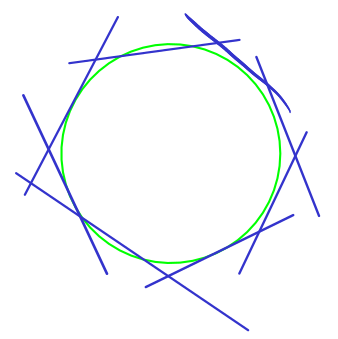

# How are the neural networks trained?

If the activation functions used are derivable (sigmoid, tanh), the mappings implemented by any neural networks
$F(x;\theta)$ are derivable both w.r.t. x and w.r.t. $\theta$.

The same holds true for the total network error $E(F(x;\theta)-t)$, when the error measurement function is derivable (e.g. MSE
$E(z)=\|z\|_2^2$
).


## (Stochastic) Gradient Descent 

### (S)GD

$$min_\theta f(\theta)$$


Local Taylor decomposition around any point $\theta_0$:

$$f(\theta)=f(\theta_0)+f'(\theta_0)*(\theta-\theta_0)+f"(\theta_0)*(\theta-\theta_0)^2+(\ldots )$$

Local linear approximation with a hyperplane (multivariate) of $f(\theta)$ around $\theta_0$

$$f(\theta)\approx f(\theta_0)+\nabla f(\theta_0)^T*(\theta-\theta_0)$$



The direction of the steepest descent is the antigradient
$$\theta_{new}=\theta-\nabla f(\theta_0)$$
ensures the steepest descent among all vectors of the same magnitude (norm) in the approximation hyperplane.

In [ ]:
import plotly.graph_objects as go

z1=np.fromfunction(lambda x,y:(x-y)**3,(100,100))

fig = go.Figure(data=[go.Surface(z=z1)])
fig.update_layout(autosize=False,width=800, height=800,margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [ ]:
import sympy as smp
from sympy import *

w,b=smp.symbols("w,b")

### Example for a single perceptron (neuron) "network"

In [ ]:
np.random.seed(20)
data=np.random.rand(10)
t=(data>0.7).astype('int')*2-1
print(t)

def neuron(x):
    return tanh(x*w+b)

#compute network SSE:
e=0
for x,y in zip(data,t):
    e+=(neuron(x)-y)**2
e

In [ ]:
e.subs(b,0.8).subs(w,-2.3)

### Error Surface

In [ ]:
k=32;range1=np.linspace(-5,5,k)
z1=[e.subs(b,u).subs(w,v) for u in range1 for v in range1]
z1=np.array(z1).reshape(k,-1).astype("float")
import matplotlib.pyplot as plt
plt.imshow(z1)
plt.colorbar()

### Error Surface

In [ ]:
fig = go.Figure(data=[go.Surface(z=z1)])
fig.update_layout(autosize=False,width=800, height=800,margin=dict(l=65, r=50, b=65, t=90))
fig.show()

# Computing the Gradient for GD/SGD

In [ ]:
e

In [ ]:
diff(e,b)

In [ ]:
diff(e,w)

### gradient

In [ ]:
[diff(e,w),diff(e,b)]

# Backpropagation

- means using the chain rules in derivation and computing the gradient w.r.t. all network's parameters starting from the output and going backward towards the input

- can be done for single sample and for a batch of samples (usually less than the whole dataset, although this is also possible)

- implemented in frameworks such as pytorch, tensorflow and implicitly in keras

- you never have to compute yourself partial derivates/gradients, this is performed automatically for you in the so called "backward pass". The forward pass is when the inputs are propagated through the network towards the output




# Frameworks for deep learning (DL)

- Tensorflow (Google) https://www.tensorflow.org/
- pytorch (Meta ex Facebook) https://pytorch.org/
- **keras (formerly independent, now Google)** https://keras.io/
- others (mxnet, etc.)


Read further about deep learning

**The Little Book
of
Deep Learning**

by François Fleuret

[https://fleuret.org/public/lbdl.pdf ]

and practice!

Source:[ https://xkcd.com/2173/ ]

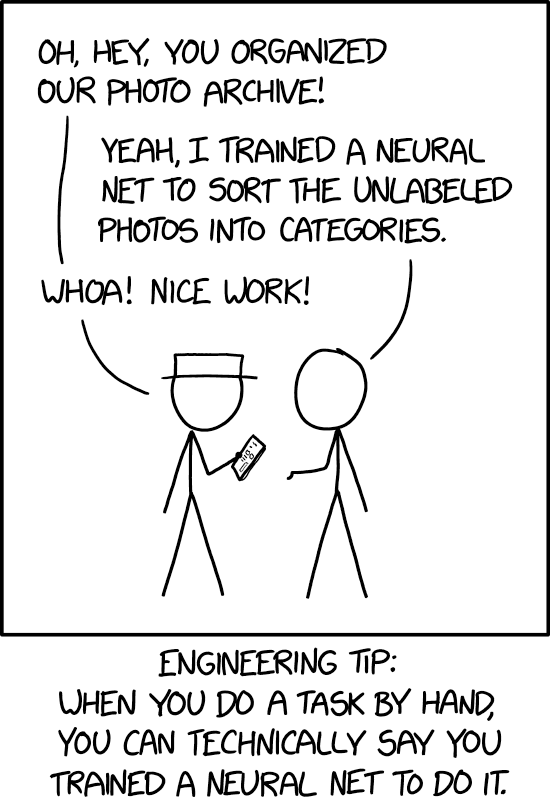



It also works for anything you teach someone else to do. &quot;Oh yeah, I trained a pair of neural nets, Emily and Kevin, to respond to support tickets.&quot;